<font color=#1a237e face="Roman"> 
  <h1 align="center"><i>Seminario de Estadística I</i></h1>
  </font>
  <font color="Black" face="Roman">
  <h6 align="center"><i>TAREA I</i></h6>
  <h6 align="center"><i>Profesor. Rodrigo Quijón Hipólito</i></h6>
    <h6 align="center"><i>Profesor. Jimmy Hernández Morales</i></h6>
    <h6 align="center"><i>Ayudante. María Ximena Aguirre Pessina </i></h6>
    <h6 align="left"><i>Integrantes:</i></h6>
    <h6 align="left"><i>1. Blancas Alvarado Isaí  -  316188506 </i></h6>
    <h6 align="left"><i>2. Espinosa Vargas Sinaí  -  316268277 </i></h6>
    <h6 align="left"><i>3. Franco Zárraga Daniel  -  316290294 </i></h6>
    <h6 align="left"><i>4. Gutiérrez Prieto Luisa Elena  -  ######### </i></h6>
    <h6 align="left"><i>5. Trujillo Jiménez Luis Felipe  -  ######### </i></h6>
  </font>

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Cargamos datos
base_comportamiento_2=pd.read_csv('base_comportamiento_2.txt', sep=" ")
base_comportamiento_3=pd.read_csv('base_comportamiento_3.csv')
base_ini_externa=pd.read_csv('base_ini_externa.txt', sep=" ")
base_ini_interna=pd.read_csv('base_ini_interna.csv')
base_ini_parte1=pd.read_csv('base_ini_parte1.csv')
base_inversion=pd.read_csv('base_inversion.txt', sep=" ")
bd_inicio_parte1=pd.read_csv('bd_inicio_parte1.txt', sep=" ")
schools=pd.read_excel('data_schools.xlsx', engine='openpyxl')
horms=pd.read_excel('lineal_horm.xlsx', engine='openpyxl')

## Análisis exploratorio
Se busca decidir si se le va a dar a una persona un crédito bancario

## Bases de comportamiento
A estos clientes ya le dieron el prestamo, ven el comportamiento del clientes una vez que se les dio el crédito

### Base comportamiento 2
**num_caso**: Es el id 

**Tiempo_aparicion**: Número de veces que aparece en la base, edad del crédito

In [3]:
#Base comportamiento 2
#Primeros renglones
base_comportamiento_2.head()

,num_caso,mes_informacion,Tiempo_aparicion
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,1.0
2,1,2016-06-01 00:00:00,2.0
3,1,2016-07-01 00:00:00,3.0
4,1,2016-08-01 00:00:00,4.0


In [4]:
base_comportamiento_2['num_caso'].unique()

array([    1,     7,     8, ..., 98990, 98992, 98997], dtype=int64)

In [5]:
len(base_comportamiento_2['num_caso'].unique())

49352

In [6]:
#Dimensiones
base_comportamiento_2.shape

(1455536, 3)

In [7]:
#Tipos de datos
base_comportamiento_2.dtypes

num_caso              int64
mes_informacion      object
Tiempo_aparicion    float64
dtype: object

### Base comportamiento 3
Nos dice una vez que le dimos el credito al cliente se registra si pago o no pago el cliente, 0 es pago, no pago es 1

In [8]:
base_comportamiento_3.head()

,num_caso,mes_informacion,comportamiento_j
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,0.0
2,1,2016-06-01 00:00:00,0.0
3,1,2016-07-01 00:00:00,0.0
4,1,2016-08-01 00:00:00,0.0


In [9]:
base_comportamiento_3['num_caso'].unique()

array([    1,     7,     8, ..., 98990, 98992, 98997], dtype=int64)

In [10]:
len(base_comportamiento_3['num_caso'].unique())

49352

In [11]:
#Dimensiones
base_comportamiento_3.shape

(1455536, 3)

In [12]:
base_comportamiento_3['comportamiento_j'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 13., 10., 12.,
       16., 18., 14., 15., 11.])

In [13]:
#Tipos de datos
base_comportamiento_3.dtypes

num_caso              int64
mes_informacion      object
comportamiento_j    float64
dtype: object

### CRUCE DE BASES 1

Las bases 2 y 3 tienen el mismo número de registros y tratan sobre los mismos registros, haremos la unión de estas bases basandonos en la fecha y el número de caso, pero primero convertimos a fecha las columnas mes_informacion

In [14]:
#convertimos en fecha la variable mes_información
base_comportamiento_2['mes_informacion']=pd.to_datetime(base_comportamiento_2['mes_informacion'])

In [15]:
#Convertimos en fecha la columna mes informacion
base_comportamiento_3['mes_informacion']=pd.to_datetime(base_comportamiento_3['mes_informacion'])

In [16]:
base_comportamiento=pd.merge(base_comportamiento_2,base_comportamiento_3,on=['num_caso','mes_informacion'])

In [17]:
base_comportamiento.head()

,num_caso,mes_informacion,Tiempo_aparicion,comportamiento_j
0,1,2016-04-01,0.0,0.0
1,1,2016-05-01,1.0,0.0
2,1,2016-06-01,2.0,0.0
3,1,2016-07-01,3.0,0.0
4,1,2016-08-01,4.0,0.0


In [18]:
base_comportamiento.shape

(1455536, 4)

In [19]:
#Comparobamos que no perdimos datos
len(base_comportamiento)==len(base_comportamiento_2) and len(base_comportamiento)==len(base_comportamiento_3) 

True

Veamos algunas estadísticas de la base de comportamiento

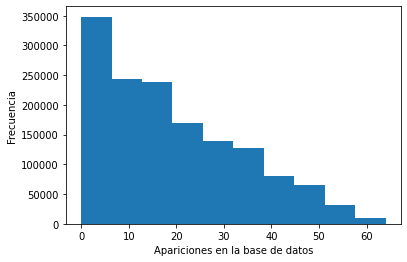

In [20]:
plt.hist(base_comportamiento['Tiempo_aparicion'])
plt.xlabel('Apariciones en la base de datos')
plt.ylabel('Frecuencia')
plt.show()

Parece que la distribución del número de apariciones en la base esta sesgada hacia la izquierda

In [21]:
print('Promedio de veces que aparecen en la base de datos los clientes: ',base_comportamiento['Tiempo_aparicion'].mean())

Promedio de veces que aparecen en la base de datos los clientes:  19.29374470985259


In [22]:
print('Mediana del número de veces que aparecen en la base de datos los clientes:', base_comportamiento['Tiempo_aparicion'].median())

Mediana del número de veces que aparecen en la base de datos los clientes: 16.0


In [23]:
#Sacamos una tabla de frecuencias de las categorias
base_comportamiento['comportamiento_j'].value_counts()

0.0     1287541
1.0      141945
2.0       11593
3.0        6315
4.0        2356
5.0        1582
6.0        1265
7.0        1089
8.0         947
9.0         854
10.0         36
11.0          3
12.0          3
18.0          2
13.0          2
14.0          1
15.0          1
16.0          1
Name: comportamiento_j, dtype: int64

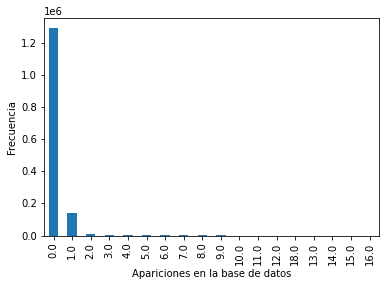

In [24]:
base_comportamiento['comportamiento_j'].value_counts().plot(kind='bar')
plt.xlabel('Apariciones en la base de datos')
plt.ylabel('Frecuencia')
plt.show()

Con esto se puede ver que la mayoria de los clientes no incumplieron ni una vez con sus pagos.


## Bases externas e internas

### Base ini externa
Simula información del cliente pero que no son datos directos dentro del banco

In [25]:
#Primeros renglones
base_ini_externa.head()

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,260.869565,25.854639,56.0,-230.0
1,76457,40.579710,2.872738,62.0,-230.0
2,40666,NaN,NaN,119.0,-230.0
3,8329,349.275362,34.616490,94.0,-230.0
4,68389,276.811594,27.434645,125.0,-230.0


In [26]:
#Dimensiones
base_ini_externa.shape

(50000, 5)

In [27]:
#Tipos de datos
base_ini_externa.dtypes

_id_               int64
comp_externo1    float64
comp_externo2    float64
comp_externo3    float64
comp_externo4    float64
dtype: object

### Base ini interna
Base que registra el momento en el que el cliente va a el banco a solicitar un crédito

**com_interno1**: Variable que el cliente tiene actualmente en la empresa

**com_interno2,3,4**: Van sobre el tipo de crédito que solicito el cliente

**categoria1,2,3**: Variables categórica

In [28]:
#Primeros renglones
base_ini_interna.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0


In [29]:
#Dimensiones
base_ini_interna.shape

(50000, 9)

In [30]:
#Tipos de datos
base_ini_interna.dtypes

_id_               int64
fecha_inicio      object
comp_interno1    float64
comp_interno2     object
comp_interno3    float64
comp_interno4    float64
categoria1       float64
categoria2       float64
categoria3       float64
dtype: object

### Base ini parte 1
**comp_mixto1**: Representa información del cliente dentro de la empresa y fuera de la misma

In [31]:
base_ini_parte1.head()

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318


In [32]:
base_ini_parte1.shape

(50000, 3)

### Base inversion
Inversión del cliente en el banco

In [33]:
base_inversion.head()

,_id2_,inversion
0,1758511,0.041039
1,1572947,77.422135
2,1051836,90.539953
3,1223255,90.205018
4,1894602,1.071354


In [34]:
base_inversion.shape

(17536, 2)

In [35]:
base_inversion.dtypes

_id2_          int64
inversion    float64
dtype: object

### bd inicio parte1


In [36]:
bd_inicio_parte1.head()

,_id_,comp_interno4
0,78213,58.0
1,76457,45.0
2,40666,45.0
3,8329,59.0
4,68389,67.0


In [37]:
bd_inicio_parte1.shape

(50000, 2)

In [38]:
bd_inicio_parte1.dtypes

_id_               int64
comp_interno4    float64
dtype: object

### CRUCE DE BASES 2

Todas las bases tienen el mismo número de registros exepto la base de inversiones por lo que aquí conviene hacer un left join, para hacer el cruce iniciare con la base_ini_interna con la externa, de ahí con la base inicio parte 1, de ahí con la base ini parte 1 y al final con la base inversión.
Los primeros cruces van con la _id_ y el último va sobre _id2_

In [39]:
#1er cruce
base=pd.merge(base_ini_interna,base_ini_externa)

In [40]:
#Comprobamos que no se hayan perdido bases
len(base)

50000

In [41]:
base.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,260.869565,25.854639,56.0,-230.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,NaN,NaN,119.0,-230.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0,349.275362,34.616490,94.0,-230.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0


In [42]:
#2do cruce
base=pd.merge(base,bd_inicio_parte1,on='_id_')

In [43]:
#Comprobamos que no se hayan perdido bases
len(base)

50000

In [44]:
base.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4_x,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_interno4_y
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,260.869565,25.854639,56.0,-230.0,58.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0,45.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,NaN,NaN,119.0,-230.0,45.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0,349.275362,34.616490,94.0,-230.0,59.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0,67.0


In [45]:
#Cruce 3
base=pd.merge(base,base_ini_parte1,on='_id_')

In [46]:
#Comprobamos que no se hayan perdido bases
len(base)

50000

In [47]:
base.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4_x,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_interno4_y,_id2_,comp_mixto1
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,260.869565,25.854639,56.0,-230.0,58.0,1798899,0.33522
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0,45.0,1758511,0.33334
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,NaN,NaN,119.0,-230.0,45.0,935318,0.29186
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0,349.275362,34.616490,94.0,-230.0,59.0,191567,0.29112
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0,67.0,1572947,0.27318


In [48]:
#Cruce 4, aquí es un left join
base=pd.merge(base,base_inversion,on='_id2_',how='left')

In [49]:
#Comprobamos que no se hayan perdido bases
len(base)

50000

In [50]:
base.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4_x,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_interno4_y,_id2_,comp_mixto1,inversion
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,260.869565,25.854639,56.0,-230.0,58.0,1798899,0.33522,NaN
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0,45.0,1758511,0.33334,0.041039
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,NaN,NaN,119.0,-230.0,45.0,935318,0.29186,NaN
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0,349.275362,34.616490,94.0,-230.0,59.0,191567,0.29112,NaN
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0,67.0,1572947,0.27318,77.422135


De aqui podemos notar que hay dos clumnas que tienen el mismo nombre y parecen ser los mismos registros, por lo que conviene verificar si esto es así y si es el caso podriamos proceder a eliminar una de las columnas repetidas

In [51]:
#Definimos una lista que guarde todos los registros que se harán al checar si cada registro de las dos columnas son iguales
lista=base['comp_interno4_x']==base['comp_interno4_y']
#Verificamos si hay algún false en la lista, si ese es el caso no habrá duplicados
lista.unique()

array([ True])

Esto comprueba que las dos columnas son las mismas por lo que podriamos proceder a eliminar una de las dos columnas, sin embargo como la columna viene repetida de la base bd_ini_parte1 y lo único que aporta esta es esa columna podriamos volver a hacer el cruce de las basees omitiendo esta base en los cruces

In [52]:
#1er cruce
base=pd.merge(base_ini_interna,base_ini_externa)
#Cruce 2
base=pd.merge(base,base_ini_parte1,on='_id_')
#Cruce 3, aquí es un left join
base=pd.merge(base,base_inversion,on='_id2_',how='left')

In [53]:
len(base)

50000

In [54]:
base.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,_id2_,comp_mixto1,inversion
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,260.869565,25.854639,56.0,-230.0,1798899,0.33522,NaN
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0,1758511,0.33334,0.041039
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,NaN,NaN,119.0,-230.0,935318,0.29186,NaN
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0,349.275362,34.616490,94.0,-230.0,191567,0.29112,NaN
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0,1572947,0.27318,77.422135


Con esto ya no hay columnas repetidas en la base

Veamos un análisis gráfico de todas las columnas numéricas

In [55]:
base_hist=base.drop(columns=['_id_','fecha_inicio','comp_interno2','_id2_'])

In [56]:
base_hist.shape

(50000, 12)

In [57]:
#Convertimos las columnas a su mejor tipo de dato posible, así podriamos identificar cuales son categorícas
base_hist=base_hist.convert_dtypes()

In [58]:
base_hist.dtypes

comp_interno1    float64
comp_interno3      Int64
comp_interno4      Int64
categoria1         Int64
categoria2         Int64
categoria3         Int64
comp_externo1    float64
comp_externo2    float64
comp_externo3      Int64
comp_externo4    float64
comp_mixto1      float64
inversion        float64
dtype: object

C:\Users\luisf\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


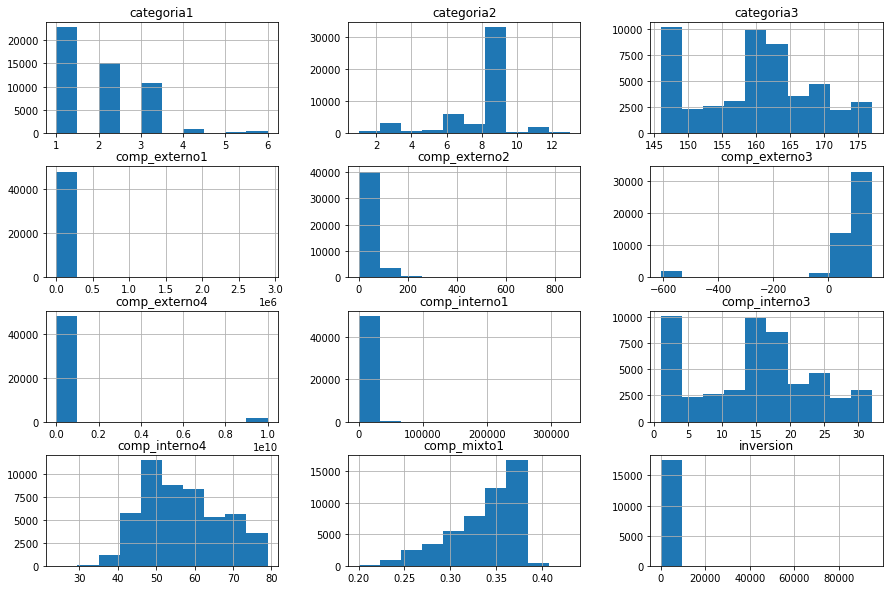

In [59]:
base_hist.hist(layout=(4,3),figsize=(15,10))
plt.show()

De aqui se puede identificar varias cosas:
* En la categoria 1 la mayoria de clientes pertenecen a la primer categoria y la menos comun es la categoria 
* En la categoria 8 al parecer  la mas común es la categoria 8
* Las bases de datos de comp_interno1, comp_externo 1,2 y 4 así como la base de inversion presentan un comportamiento muy similar concentrandose en sus primeros valores 
* Las base comp_externo 3 presenta un comportamiento donde la mayoria de sus valores se concentran al final de su rango, aqui existen valores nulos
* Categoria 3 y com_interno3 presentan la misma distribución por lo que estas dos variables podrian guardar algun tipo de relación 
* Comp_interno4 esta sesgada hacia la derecha 
* Comp_mixto1 esta sesgada hacia la izquierda


## Cruce final
Ahora hay que cruzar las bases del comportamiento de los clientes a los que les dio el crédito y la base donde se registran sus datos cuando lo solicitaron.

Para esto agruparemos la base por el número de caso y sumaremos su comportamiento ya que este nos indica si incumplió con un pago, los datos del mes de información y tiempo de aparición no consideramos que aporten mucho a la base ya que solo dan la fecha del registro y el número del registro para el cliente

Ahora, crearemos varias variables mas:
* num_impagos: Mide cuantas veces el cliente incumplio con el pago que o no liquidaba su deuda por completo
* num_impagos_acum: Mide el número de impagos totales que registro el cliente a lo largo de su historia
* num_impagos_intervalo: Intervalo en el que se encuentra el cliente en relación a los demás con el número de impagos
* num_impagos_acum_intervalo: Intervalo en el que se encuentra el cliente en relación con los demas clientes basado en el número de impagos acumulados
* incumplimiento: Indica si un cliente dejó de pagar su crédito en lo que va de tiempo no volvió a retomarlo.

### num_impagos

In [60]:
#Extraemos las columnas número de caso y comportamiento_j
base_c_cruce_2=base_comportamiento[['num_caso','comportamiento_j']]
base_c_cruce_2.head()

,num_caso,comportamiento_j
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0


In [61]:
#Creamos una lista de comprensión donde se guarden los valores de nuestra nueva columna
#Aqui registra 0 si el cliente pago o liquido su deuda y un 1 si no pago o sigue sin liquidar su deuda totalmente
lista=[1 if i>0 else 0 for i in base_c_cruce_2['comportamiento_j']]
#Añadimos la lista a la base
base_c_cruce_2['num_impagos']=lista

<ipython-input-61-0c631d9993bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_c_cruce_2['num_impagos']=lista


In [62]:
#Comprobamos que haya funcionado con los primero registros
base_c_cruce_2[base_c_cruce_2['num_impagos']==1].head(15)

,num_caso,comportamiento_j,num_impagos
9,1,1.0,1
12,1,1.0,1
13,1,1.0,1
14,1,1.0,1
32,1,1.0,1
33,1,1.0,1
59,1,1.0,1
71,7,1.0,1
72,7,1.0,1
73,7,2.0,1


In [63]:
#Esta base ya tiene el número de veces que el cliente no pago
base_c_cruce_2=base_c_cruce_2.groupby('num_caso')['num_impagos'].sum().reset_index()
base_c_cruce_2.head()

,num_caso,num_impagos
0,1,7
1,7,9
2,8,4
3,9,0
4,10,1


In [64]:
#Frecuencia absoluta de las primeros 10 variables ordinales
base_c_cruce_2['num_impagos'].value_counts().head(10)

0    9945
1    8765
2    7490
3    6125
4    4929
5    3498
6    2445
7    1642
8     964
9     694
Name: num_impagos, dtype: int64

In [65]:
#Cantidad de categorias
len(base_c_cruce_2['num_impagos'].value_counts())

50

In [66]:
#Frecuencia relativa de las primeros 10 variables ordinales
round(base_c_cruce_2['num_impagos'].value_counts(True).head(10)*100,2).astype('str')+'%'

0    20.15%
1    17.76%
2    15.18%
3    12.41%
4     9.99%
5     7.09%
6     4.95%
7     3.33%
8     1.95%
9     1.41%
Name: num_impagos, dtype: object

De aqui se puede ver que que al rededor de un 81% de los clientes no registraron menos de 5 impagos en todo su historial de la base

### num_impagos_acum

In [67]:
base_c_cruce=base_comportamiento[['num_caso','comportamiento_j']]
base_c_cruce=base_c_cruce.groupby('num_caso')['comportamiento_j'].sum().reset_index()

In [68]:
base_c_cruce.head()

,num_caso,comportamiento_j
0,1,7.0
1,7,24.0
2,8,4.0
3,9,0.0
4,10,1.0


Antes veamos una tabla de frecuencias y un gráfico de los incumplimientos de los pagos

In [69]:
base_c_cruce.comportamiento_j.value_counts()

0.0      9945
1.0      8764
2.0      7466
3.0      6083
4.0      4866
         ... 
123.0       1
112.0       1
106.0       1
130.0       1
135.0       1
Name: comportamiento_j, Length: 123, dtype: int64

In [70]:
#Frecuencia relativa de las primeros 
round(base_c_cruce['comportamiento_j'].value_counts(True)*100,3).astype('str')+'%'

0.0      20.151%
1.0      17.758%
2.0      15.128%
3.0      12.326%
4.0        9.86%
          ...   
123.0     0.002%
112.0     0.002%
106.0     0.002%
130.0     0.002%
135.0     0.002%
Name: comportamiento_j, Length: 123, dtype: object

In [71]:
#Renombramos las columnas
base_c_cruce.columns=['num_caso','num_impagos_acum']

De aqui podemos ver que al rededor de un 75% de los clientes registraron menos de 4 impagos acumulados a lo largo de su historia dentro de la base
### num_impagos_intervalo
Como se tiene una longitud de 50 entradas dividiremos las variables en 5 intervalos, usaremos la función pd.cut() para hacerlo

In [72]:
#Calculamos los intervalos en los que se partirá la variable
pd.cut(base_c_cruce_2['num_impagos'],5).unique()

[(-0.051, 10.2], (10.2, 20.4], (20.4, 30.6], (30.6, 40.8], (40.8, 51.0]]
Categories (5, interval[float64]): [(-0.051, 10.2] < (10.2, 20.4] < (20.4, 30.6] < (30.6, 40.8] < (40.8, 51.0]]

Los intervalos generados son:
* 1: \[0,10\]
* 2: \[10,20\]
* 3: \[20,30\]
* 4:\[30,40\]
* 5:\[40,51\]

In [73]:
#Partimos la columna en estos intervalos
base_c_cruce_2['num_impagos_intervalo']=pd.cut(base_c_cruce_2['num_impagos'],5,labels=[1,2,3,4,5])
base_c_cruce_2.head()

,num_caso,num_impagos,num_impagos_intervalo
0,1,7,1
1,7,9,1
2,8,4,1
3,9,0,1
4,10,1,1


In [74]:
#Frecuencia absoluta
base_c_cruce_2['num_impagos_intervalo'].value_counts()

1    46927
2     1718
3      530
4      155
5       22
Name: num_impagos_intervalo, dtype: int64

In [75]:
#Frecuencia relativa
round(base_c_cruce_2['num_impagos_intervalo'].value_counts(True)*100,2).astype('str')+'%'

1    95.09%
2     3.48%
3     1.07%
4     0.31%
5     0.04%
Name: num_impagos_intervalo, dtype: object

<AxesSubplot:>

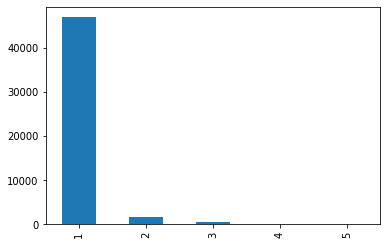

In [76]:
#Hacemos un gráfico de barras
base_c_cruce_2['num_impagos_intervalo'].value_counts().plot(kind='bar')

Un 95% de los clientes tienen entre 0 y 10 impagos
### num_impagos_acum_intervalo
De igual forma partiremos la información en 5 intervalos de la misma longitud

In [77]:
#Calculamos los intervalos en los que se partirá la variable
pd.cut(base_c_cruce['num_impagos_acum'],5).unique()

[(-0.19, 38.0], (38.0, 76.0], (76.0, 114.0], (114.0, 152.0], (152.0, 190.0]]
Categories (5, interval[float64]): [(-0.19, 38.0] < (38.0, 76.0] < (76.0, 114.0] < (114.0, 152.0] < (152.0, 190.0]]

Los datos se partieron en los siguientes intervalos:
* Intervalo 1: \[0,38\]
* Intervalo 2: \[39,76\]
* Intervalo 3: \[77,114\]
* Intervalo 4: \[115,152\]
* Intervalo 5: \[152,190\]



In [78]:
base_c_cruce['num_impagos_acum_intervalo']=pd.cut(base_c_cruce['num_impagos_acum'],5,labels=[1,2,3,4,5])

In [79]:
#Frecuencias absolutas
base_c_cruce['num_impagos_acum_intervalo'].value_counts()

1    47981
2     1209
3      150
4       11
5        1
Name: num_impagos_acum_intervalo, dtype: int64

In [80]:
#Frecuencia relativa
round(base_c_cruce['num_impagos_acum_intervalo'].value_counts(True)*100,3).astype('str')+'%'

1    97.222%
2      2.45%
3     0.304%
4     0.022%
5     0.002%
Name: num_impagos_acum_intervalo, dtype: object

Un 97% de los clientes caen en el primer intervalo

In [81]:
base_c_cruce.columns=['_id_','num_impagos_acum','num_impagos_acum_intervalo']
base_c_cruce_2.columns=['_id_','num_impagos','num_impagos_intervalo']

In [82]:
len(base_c_cruce)==len(base_c_cruce_2)

True

Ahora juntamos las dos bases de comportamiento por el id y de ahí la juntamos con la base de los clientes que solicitaron el crédito, será a travéz de un left join y de ahí separaremos en dos bases para hacer un análisis donde veremos en que categorias de cada columna estan los clientes que no recibieron el crédito y en cuales estan los que si recibieron el crédito

In [83]:
base_cruce_1=pd.merge(base_c_cruce_2,base_c_cruce,on='_id_')

In [84]:
len(base_cruce_1)==len(base_c_cruce_2)

True

In [85]:
base_cruce_1.head()

,_id_,num_impagos,num_impagos_intervalo,num_impagos_acum,num_impagos_acum_intervalo
0,1,7,1,7.0,1
1,7,9,1,24.0,1
2,8,4,1,4.0,1
3,9,0,1,0.0,1
4,10,1,1,1.0,1


In [86]:
base_final=pd.merge(base,base_cruce_1,on='_id_',how='left')

In [87]:
base_final.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,_id2_,comp_mixto1,inversion,num_impagos,num_impagos_intervalo,num_impagos_acum,num_impagos_acum_intervalo
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,260.869565,25.854639,56.0,-230.0,1798899,0.33522,NaN,1.0,1,1.0,1
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0,1758511,0.33334,0.041039,1.0,1,1.0,1
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,NaN,NaN,119.0,-230.0,935318,0.29186,NaN,2.0,1,2.0,1
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0,349.275362,34.616490,94.0,-230.0,191567,0.29112,NaN,0.0,1,0.0,1
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0,1572947,0.27318,77.422135,1.0,1,1.0,1


In [88]:
base_final.isna().sum()

_id_                              0
fecha_inicio                      0
comp_interno1                     0
comp_interno2                     0
comp_interno3                     0
comp_interno4                     0
categoria1                        0
categoria2                        0
categoria3                        0
comp_externo1                  2169
comp_externo2                  5590
comp_externo3                     6
comp_externo4                     0
_id2_                             0
comp_mixto1                       0
inversion                     32464
num_impagos                     648
num_impagos_intervalo           648
num_impagos_acum                648
num_impagos_acum_intervalo      648
dtype: int64

In [89]:
base_aceptados=base_final[~base_final.num_impagos.isna()]
base_no_aceptados=base_final[base_final.num_impagos.isna()]

In [90]:
len(base_aceptados)

49352

In [91]:
len(base_no_aceptados)

648

A 49352 clientes se les dió el crédito y a 648 clientes no se les dio el crédito, veamos que diferencia a cada cliente

In [ ]:
#Convertimos los tipos de datos
base_aceptados=base_aceptados.convert_dtypes()
base_no_aceptados=base_no_aceptados.convert_dtypes()

In [128]:
base_aceptados.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,_id2_,comp_mixto1,inversion,num_impagos,num_impagos_intervalo,num_impagos_acum,num_impagos_acum_intervalo
0,78213,2020-03-25,0.000000,b'0',11,58,2,9,156,260.869565,25.854639,56,-230.0,1798899,0.33522,NaN,1,1,1,1
1,76457,2020-02-13,0.000000,b'1',28,45,1,4,173,40.579710,2.872738,62,-230.0,1758511,0.33334,0.041039,1,1,1,1
2,40666,2018-01-24,0.000000,b'1',25,45,1,9,170,NaN,NaN,119,-230.0,935318,0.29186,NaN,2,1,2,1
3,8329,2016-10-07,0.000000,b'1',14,59,3,3,159,349.275362,34.616490,94,-230.0,191567,0.29112,NaN,0,1,0,1
4,68389,2019-07-30,2026.342452,b'1',1,67,2,9,146,276.811594,27.434645,125,-230.0,1572947,0.27318,77.422135,1,1,1,1


In [127]:
base_no_aceptados.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,_id2_,comp_mixto1,inversion,num_impagos,num_impagos_intervalo,num_impagos_acum,num_impagos_acum_intervalo
80,96667,2021-03-23,0.00000,b'0',1,64,2,9,146,324.637681,32.174662,127,-230.0,2223341,0.36504,NaN,<NA>,NaN,<NA>,NaN
107,97397,2021-04-08,0.00000,b'0',19,64,4,9,164,858.840580,85.119219,134,-230.0,2240131,0.38000,NaN,<NA>,NaN,<NA>,NaN
131,98330,2021-04-05,0.00000,b'1',19,44,1,9,164,156.521739,15.512784,109,-230.0,2261590,0.34680,0.105438,<NA>,NaN,<NA>,NaN
201,33487,2017-09-20,1008.10537,b'1',28,59,2,9,173,57.971014,NaN,131,-230.0,770201,0.24514,NaN,<NA>,NaN,<NA>,NaN
442,96681,2021-03-25,0.00000,b'1',21,74,1,6,166,886.956522,87.905774,115,-230.0,2223663,0.30776,NaN,<NA>,NaN,<NA>,NaN


In [149]:
base_aceptados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   _id_                        49352 non-null  Int64   
 1   fecha_inicio                49352 non-null  string  
 2   comp_interno1               49352 non-null  float64 
 3   comp_interno2               49352 non-null  string  
 4   comp_interno3               49352 non-null  Int64   
 5   comp_interno4               49352 non-null  Int64   
 6   categoria1                  49352 non-null  Int64   
 7   categoria2                  49352 non-null  Int64   
 8   categoria3                  49352 non-null  Int64   
 9   comp_externo1               47202 non-null  float64 
 10  comp_externo2               43826 non-null  float64 
 11  comp_externo3               49346 non-null  Int64   
 12  comp_externo4               49352 non-null  float64 
 13  _id2_           

In [150]:
base_no_aceptados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 80 to 49962
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   _id_                        648 non-null    Int64   
 1   fecha_inicio                648 non-null    string  
 2   comp_interno1               648 non-null    float64 
 3   comp_interno2               648 non-null    string  
 4   comp_interno3               648 non-null    Int64   
 5   comp_interno4               648 non-null    Int64   
 6   categoria1                  648 non-null    Int64   
 7   categoria2                  648 non-null    Int64   
 8   categoria3                  648 non-null    Int64   
 9   comp_externo1               629 non-null    float64 
 10  comp_externo2               584 non-null    float64 
 11  comp_externo3               648 non-null    Int64   
 12  comp_externo4               648 non-null    float64 
 13  _id2_            

### Comportamiento interno 1


Resumen estadístico aceptados:
count     49352.000000
mean       1057.320543
std        5065.784034
min           0.000000
25%           0.000000
50%           0.000000
75%        1013.171226
max      329483.282675
Name: comp_interno1, dtype: float64

Resumen estadístico no aceptados:
count      648.000000
mean      1153.881634
std       3668.459749
min          0.000000
25%          0.000000
50%          0.000000
75%       1215.805471
max      70921.985816
Name: comp_interno1, dtype: float64


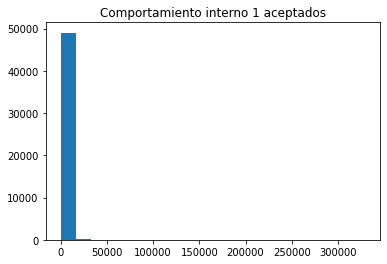

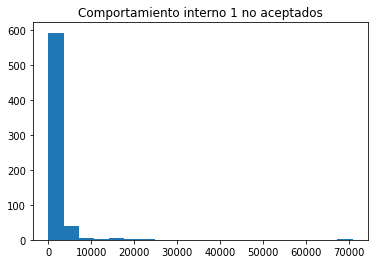

In [135]:
#Descripción del comportamiento interno 1 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['comp_interno1'].describe())

#Descripción del comportamiento interno 1 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['comp_interno1'].describe())

#Gráfica aceptados
plt.hist(base_aceptados['comp_interno1'],bins=20)
plt.title('Comportamiento interno 1 aceptados')
plt.show()

#Gráfica no aceptados
plt.hist(base_no_aceptados['comp_interno1'],bins=20)
plt.title('Comportamiento interno 1 no aceptados')
plt.show()

Parece que estas doa variables poseen un comportamiento similar, ambas tienen inician en 0 y poseen valores muy extremos, sus cuantiles son parecidos  pero los datos de la base de no aceptados se encuentranb mas dispersos y esto es a que el rango de los datos es mucho mayor.

### Comportamiento interno 2

Resumen estadístico aceptados:
count     49352
unique        2
top        b'1'
freq      34835
Name: comp_interno2, dtype: object

Resumen estadístico no aceptados:
count      648
unique       2
top       b'1'
freq       457
Name: comp_interno2, dtype: object

Frecuencias relativas aceptados
b'1'    70.58%
b'0'    29.42%
Name: comp_interno2, dtype: object

Frecuencias relativas no aceptados
b'1'    70.52%
b'0'    29.48%
Name: comp_interno2, dtype: object


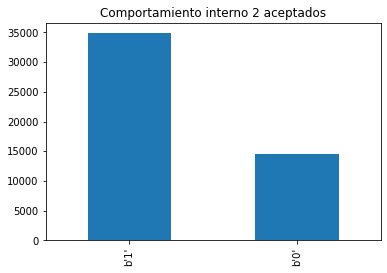

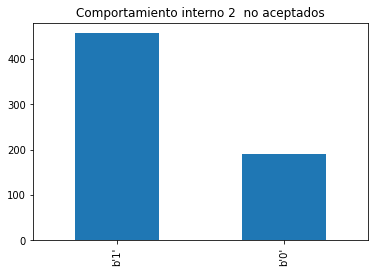

In [134]:
#Descripción del comportamiento interno 2 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['comp_interno2'].describe())

#Descripción del comportamiento interno 2 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['comp_interno2'].describe())

#Tabla de frecuencias relativas
print('\nFrecuencias relativas aceptados')
print(round((base_aceptados['comp_interno2'].value_counts()/sum(base_aceptados['comp_interno2'].value_counts()))*100,2).astype('str')+'%')

#Tabla de frecuencias relativas
print('\nFrecuencias relativas no aceptados')
print(round((base_no_aceptados['comp_interno2'].value_counts()/sum(base_no_aceptados['comp_interno2'].value_counts()))*100,2).astype('str')+'%')

#Gráfica aceptados
base_aceptados['comp_interno2'].value_counts().plot(kind='bar')
plt.title('Comportamiento interno 2 aceptados')
plt.show()

#Gráfica no aceptados
base_no_aceptados['comp_interno2'].value_counts().plot(kind='bar')
plt.title('Comportamiento interno 2  no aceptados')
plt.show()

Esta variable presenta un comportamiento idéntico en las dos bases de datos por lo que parece no influir en que un cliente tenga o no tenga crédito
### Comportamiento interno 3

Resumen estadístico aceptados:
count    49352.000000
mean        14.669699
std          8.814331
min          1.000000
25%          8.000000
50%         15.000000
75%         21.000000
max         32.000000
Name: comp_interno3, dtype: float64

Resumen estadístico no aceptados:
count    648.000000
mean      14.209877
std        8.963558
min        1.000000
25%        6.000000
50%       15.000000
75%       21.000000
max       32.000000
Name: comp_interno3, dtype: float64

Frecuencias relativas aceptados:
1     14.44%
19    14.18%
14    10.88%
15     7.42%
11     4.32%
24     3.57%
25     3.56%
6      3.51%
22     3.48%
9      3.31%
21     3.18%
30     3.08%
3      2.54%
2      2.33%
23     2.25%
31     2.02%
26     1.99%
28     1.93%
17      1.8%
16     1.52%
18      1.1%
13     1.05%
10     1.01%
8      0.89%
4      0.87%
7      0.84%
32     0.77%
12      0.7%
27     0.56%
20     0.49%
5      0.27%
29     0.14%
Name: comp_interno3, dtype: object

Frecuencias relativas no aceptados:
1   

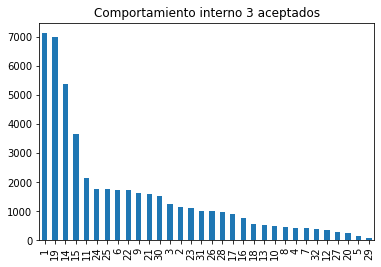

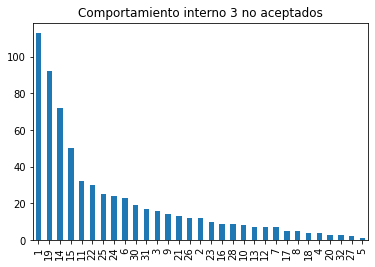

In [132]:
#Descripción del comportamiento interno 3 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['comp_interno3'].describe())

#Descripción del comportamiento interno 3 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['comp_interno3'].describe())

#Tabla de frecuencias relativas
print('\nFrecuencias relativas aceptados:')
print(round((base_aceptados['comp_interno3'].value_counts()/sum(base_aceptados['comp_interno3'].value_counts()))*100,2).astype('str')+'%')

#Tabla de frecuencias relativas
print('\nFrecuencias relativas no aceptados:')
print(round((base_no_aceptados['comp_interno3'].value_counts()/sum(base_no_aceptados['comp_interno3'].value_counts()))*100,2).astype('str')+'%')

#Gráfica aceptados
base_aceptados['comp_interno3'].value_counts().plot(kind='bar')
plt.title('Comportamiento interno 3 aceptados')
plt.show()

#Gráfica no aceptados
base_no_aceptados['comp_interno3'].value_counts().plot(kind='bar')
plt.title('Comportamiento interno 3 no aceptados')
plt.show()

Igual esta variable presenta un comportamiento muy similar en las dos bases por lo que parece que no inlfuye en la decisión
### Comportamiento interno 4

Resumen estadístico aceptados:
count    49352.000000
mean        56.527051
std         10.051360
min         24.000000
25%         48.000000
50%         55.000000
75%         64.000000
max         79.000000
Name: comp_interno4, dtype: float64

Resumen estadístico no aceptados:
count    648.000000
mean      57.328704
std       10.044644
min       29.000000
25%       49.000000
50%       57.000000
75%       65.000000
max       75.000000
Name: comp_interno4, dtype: float64

Frecuencias relativas aceptados:
75    4.85%
51    3.99%
50    3.92%
48    3.92%
49    3.86%
52    3.83%
53    3.72%
47    3.71%
46    3.51%
54    3.44%
55    3.34%
56     3.2%
45     3.2%
57    3.05%
58    2.95%
44    2.81%
59    2.79%
60    2.71%
62    2.55%
61    2.52%
43    2.39%
64    2.26%
63    2.24%
74     2.2%
65    2.11%
71    2.09%
66    2.05%
67    1.97%
72    1.91%
73    1.84%
68    1.81%
69    1.81%
70    1.78%
42    1.72%
41     1.3%
40    0.87%
39     0.6%
38    0.35%
37    0.25%
36    0.15%
76    0.11%


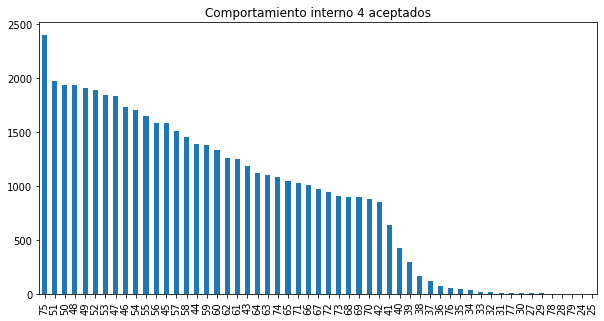

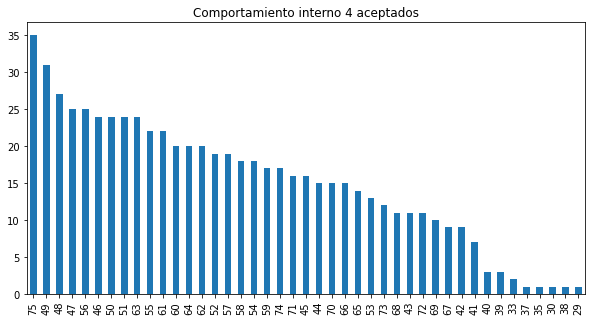

In [131]:
#Descripción del comportamiento interno 4 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['comp_interno4'].describe())

#Descripción del comportamiento interno 4 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['comp_interno4'].describe())

#Tabla de frecuencias relativas aceptados
print('\nFrecuencias relativas aceptados:')
print(round((base_aceptados['comp_interno4'].value_counts()/sum(base_aceptados['comp_interno4'].value_counts()))*100,2).astype('str')+'%')

#Tabla de frecuencias relativas no aceptados
print('\nFrecuencias relativas no aceptados:')
print(round((base_no_aceptados['comp_interno4'].value_counts()/sum(base_no_aceptados['comp_interno4'].value_counts()))*100,2).astype('str')+'%')

#Gráfica aceptados
base_aceptados['comp_interno4'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Comportamiento interno 4 aceptados')
plt.show()

#Gráfica no aceptados
base_no_aceptados['comp_interno4'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Comportamiento interno 4 no aceptados')
plt.show()

Las dos variables presentan comportamientos similares por lo que parecen no influir en la elección del crédito
### Categoria 1

Resumen estadístico aceptados:
count    49352.000000
mean         1.842256
std          0.940565
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: categoria1, dtype: float64

Resumen estadístico no aceptados:
count    648.000000
mean       1.845679
std        0.870758
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        6.000000
Name: categoria1, dtype: float64

Frecuencias relativas aceptados:
1    45.35%
2    30.18%
3    21.48%
4     1.67%
6     0.79%
5     0.53%
Name: categoria1, dtype: object

Frecuencias relativas no aceptados:
1    42.28%
2     33.8%
3    22.07%
4     1.23%
6     0.46%
5     0.15%
Name: categoria1, dtype: object


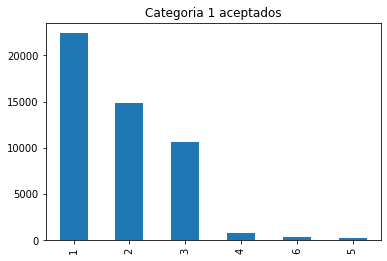

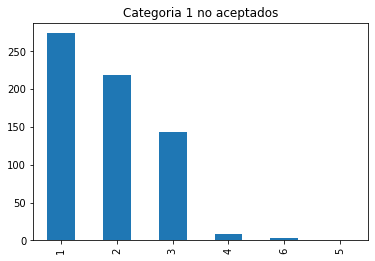

In [137]:
#Descripción de la categoria 1 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['categoria1'].describe())

#Descripción de la categoria 1 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['categoria1'].describe())

#Tabla de frecuencias relativas aceptados
print('\nFrecuencias relativas aceptados:')
print(round((base_aceptados['categoria1'].value_counts()/sum(base_aceptados['categoria1'].value_counts()))*100,2).astype('str')+'%')

#Tabla de frecuencias relativas no aceptados
print('\nFrecuencias relativas no aceptados:')
print(round((base_no_aceptados['categoria1'].value_counts()/sum(base_no_aceptados['categoria1'].value_counts()))*100,2).astype('str')+'%')

#Gráfica aceptados
base_aceptados['categoria1'].value_counts().plot(kind='bar')
plt.title('Categoria 1 aceptados')
plt.show()

#Gráfica no aceptados
base_no_aceptados['categoria1'].value_counts().plot(kind='bar')
plt.title('Categoria 1 no aceptados')
plt.show()

Presentan un comportamiento muy similar las dos variables por lo que parece no influir esta variable en la decisión
### Categoria 2

Resumen estadístico aceptados:
count    49352.000000
mean         8.029178
std          2.040511
min          1.000000
25%          7.000000
50%          9.000000
75%          9.000000
max         13.000000
Name: categoria2, dtype: float64

Resumen estadístico no aceptados:
count    648.000000
mean       8.452160
std        1.652368
min        1.000000
25%        9.000000
50%        9.000000
75%        9.000000
max       13.000000
Name: categoria2, dtype: float64

Frecuencias relativas aceptados:
9      66.0%
6     12.25%
3      6.27%
8       4.0%
11     3.68%
5      2.15%
7      1.76%
4      1.55%
1      0.93%
10      0.8%
13     0.38%
2      0.18%
12     0.06%
Name: categoria2, dtype: object

Frecuencias relativas no aceptados:
9     77.31%
6      8.64%
11     3.55%
3       3.4%
8      2.62%
5      1.23%
4      1.08%
7      0.62%
10     0.62%
1      0.46%
13     0.31%
12     0.15%
Name: categoria2, dtype: object


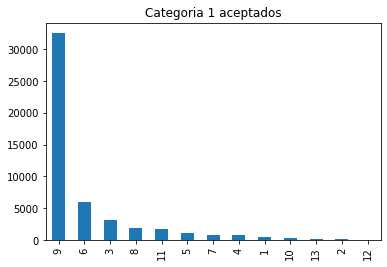

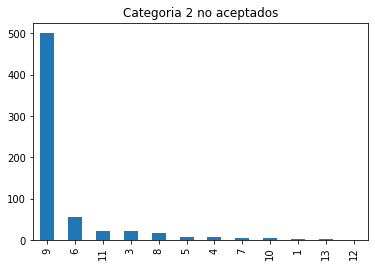

In [138]:
#Descripción de la categoria 2 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['categoria2'].describe())

#Descripción de la categoria 2 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['categoria2'].describe())

#Tabla de frecuencias relativas aceptados
print('\nFrecuencias relativas aceptados:')
print(round((base_aceptados['categoria2'].value_counts()/sum(base_aceptados['categoria2'].value_counts()))*100,2).astype('str')+'%')

#Tabla de frecuencias relativas no aceptados
print('\nFrecuencias relativas no aceptados:')
print(round((base_no_aceptados['categoria2'].value_counts()/sum(base_no_aceptados['categoria2'].value_counts()))*100,2).astype('str')+'%')

#Gráfica aceptados
base_aceptados['categoria2'].value_counts().plot(kind='bar')
plt.title('Categoria 1 aceptados')
plt.show()

#Gráfica no aceptados
base_no_aceptados['categoria2'].value_counts().plot(kind='bar')
plt.title('Categoria 2 no aceptados')
plt.show()

Presentan un comportamiento similar, parece no influir en la decisión
### Categoria 3

Resumen estadístico aceptados:
count    49352.000000
mean       159.669699
std          8.814331
min        146.000000
25%        153.000000
50%        160.000000
75%        166.000000
max        177.000000
Name: categoria3, dtype: float64

Resumen estadístico no aceptados:
count    648.000000
mean     159.209877
std        8.963558
min      146.000000
25%      151.000000
50%      160.000000
75%      166.000000
max      177.000000
Name: categoria3, dtype: float64

Frecuencias relativas aceptados:
146    14.44%
164    14.18%
159    10.88%
160     7.42%
156     4.32%
169     3.57%
170     3.56%
151     3.51%
167     3.48%
154     3.31%
166     3.18%
175     3.08%
148     2.54%
147     2.33%
168     2.25%
176     2.02%
171     1.99%
173     1.93%
162      1.8%
161     1.52%
163      1.1%
158     1.05%
155     1.01%
153     0.89%
149     0.87%
152     0.84%
177     0.77%
157      0.7%
172     0.56%
165     0.49%
150     0.27%
174     0.14%
Name: categoria3, dtype: object

Frecuencias relat

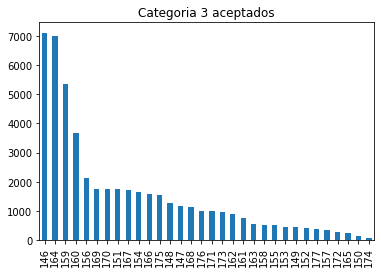

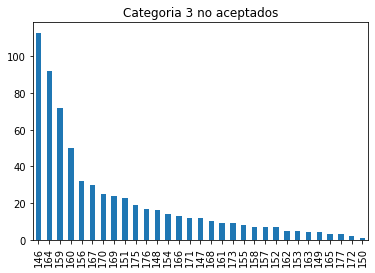

In [140]:
#Descripción de la categoria 3 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['categoria3'].describe())

#Descripción de la categoria 3 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['categoria3'].describe())

#Tabla de frecuencias relativas aceptados
print('\nFrecuencias relativas aceptados:')
print(round((base_aceptados['categoria3'].value_counts()/sum(base_aceptados['categoria3'].value_counts()))*100,2).astype('str')+'%')

#Tabla de frecuencias relativas no aceptados
print('\nFrecuencias relativas no aceptados:')
print(round((base_no_aceptados['categoria3'].value_counts()/sum(base_no_aceptados['categoria3'].value_counts()))*100,2).astype('str')+'%')

#Gráfica aceptados
base_aceptados['categoria3'].value_counts().plot(kind='bar')
plt.title('Categoria 3 aceptados')
plt.show()

#Gráfica no aceptados
base_no_aceptados['categoria3'].value_counts().plot(kind='bar')
plt.title('Categoria 3 no aceptados')
plt.show()

Presentan un comportamiento muy similar lass dos bases 
### Comportamiento externo 1

Resumen estadístico aceptados:
count      47202.000000
mean         623.816519
std        17755.132788
min            0.000000
25%          130.434783
50%          263.768116
75%          541.653623
max      2898550.721739
Name: comp_externo1, dtype: object

Resumen estadístico no aceptados:
count      629.000000
mean       527.725725
std        762.219696
min          0.000000
25%        162.028986
50%        347.826087
75%        666.666667
max      14492.753623
Name: comp_externo1, dtype: float64


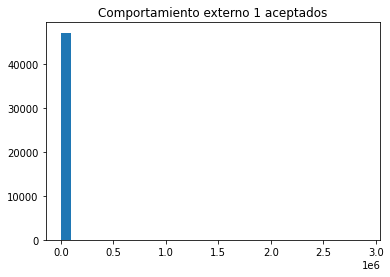

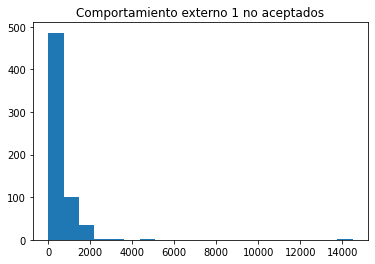

In [146]:
#Descripción del comportamiento externo 1 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['comp_externo1'].describe().apply(lambda x: format(x, 'f')))

#Descripción del comportamiento externo 1 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['comp_externo1'].describe())

#Gráfica aceptados
plt.hist(base_aceptados['comp_externo1'],bins=30)
plt.title('Comportamiento externo 1 aceptados')
plt.show()

#Gráfica no aceptados
plt.hist(base_no_aceptados['comp_externo1'],bins=20)
plt.title('Comportamiento externo 1 no aceptados')
plt.show()

Estas variables presentan comportamientos similares sin embargo en los casos aprobados existen valores mas extremos y mucho mas grandes que en los casos donde se les negó el crédito
### Comportamiento extremo 2

Resumen estadístico aceptados:
count    43826.000000
mean        37.483438
std         40.313783
min          0.000287
25%         11.778225
50%         23.556449
75%         48.980178
max        861.821316
Name: comp_externo2, dtype: object

Resumen estadístico no aceptados:
count    584.000000
mean      48.034130
std       49.299064
min        0.143637
25%       15.512784
50%       30.824619
75%       64.708417
max      488.710141
Name: comp_externo2, dtype: float64


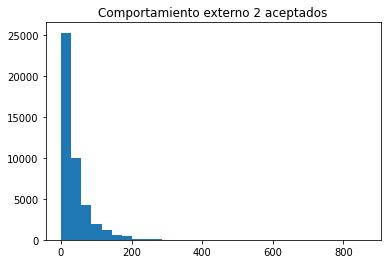

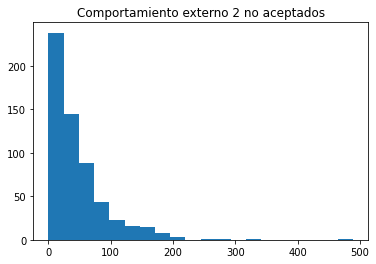

In [147]:
#Descripción del comportamiento externo 1 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['comp_externo2'].describe().apply(lambda x: format(x, 'f')))

#Descripción del comportamiento externo 1 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['comp_externo2'].describe())

#Gráfica aceptados
plt.hist(base_aceptados['comp_externo2'],bins=30)
plt.title('Comportamiento externo 2 aceptados')
plt.show()

#Gráfica no aceptados
plt.hist(base_no_aceptados['comp_externo2'],bins=20)
plt.title('Comportamiento externo 2 no aceptados')
plt.show()

En estas dos variables la distribución es bastante similar sin embargo los datos de los aceptados estan en un rango mas amplio por lo que esta un poco mas dispersa la información
### Comportamiento externo 3

Resumen estadístico aceptados:
count    49346.000000
mean        66.162587
std        140.203718
min       -609.000000
25%         71.000000
50%         99.000000
75%        120.000000
max        159.000000
Name: comp_externo3, dtype: object

Resumen estadístico no aceptados:
count    648.000000
mean      82.947531
std      124.458892
min     -609.000000
25%       89.000000
50%      114.000000
75%      127.000000
max      137.000000
Name: comp_externo3, dtype: float64

Frecuencias relativas aceptados:
 132    3.058%
 128    2.511%
 131    2.324%
-609    2.318%
 129    2.318%
         ...  
 154    0.002%
-65     0.002%
 156    0.002%
-59     0.002%
 159    0.002%
Name: comp_externo3, Length: 237, dtype: object

Frecuencias relativas no aceptados:
 132    5.247%
 128    4.784%
 129    4.475%
 124    4.167%
 131    3.549%
         ...  
 33     0.154%
-35     0.154%
 38     0.154%
-8      0.154%
-1      0.154%
Name: comp_externo3, Length: 109, dtype: object


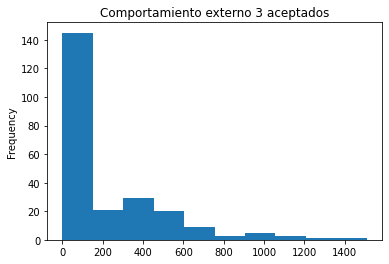

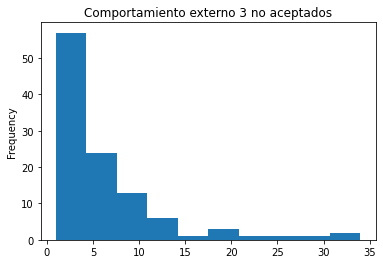

In [154]:
#Descripción del comportamiento externo 1 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['comp_externo3'].describe().apply(lambda x: format(x, 'f')))

#Descripción del comportamiento externo 1 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['comp_externo3'].describe())

#Tabla de frecuencias relativas aceptados
print('\nFrecuencias relativas aceptados:')
print(round((base_aceptados['comp_externo3'].value_counts()/sum(base_aceptados['comp_externo3'].value_counts()))*100,3).astype('str')+'%')

#Tabla de frecuencias relativas no aceptados
print('\nFrecuencias relativas no aceptados:')
print(round((base_no_aceptados['comp_externo3'].value_counts()/sum(base_no_aceptados['comp_externo3'].value_counts()))*100,3).astype('str')+'%')

#Gráfica aceptados
base_aceptados['comp_externo3'].value_counts().plot(kind='hist')
plt.title('Comportamiento externo 3 aceptados')
plt.show()

#Gráfica no aceptados
base_no_aceptados['comp_externo3'].value_counts().plot(kind='hist')
plt.title('Comportamiento externo 3 no aceptados')
plt.show()

###  Comportamiento externo 4


Resumen estadístico aceptados:
count         49352.000000
mean      318527894.574356
std      1756098962.556995
min            -230.000000
25%            -230.000000
50%            -230.000000
75%            -230.000000
max      9999999769.990000
Name: comp_externo4, dtype: object

Resumen estadístico no aceptados:
count    6.480000e+02
mean     2.469134e+08
std      1.553027e+09
min     -2.300000e+02
25%     -2.300000e+02
50%     -2.300000e+02
75%     -2.300000e+02
max      1.000000e+10
Name: comp_externo4, dtype: float64


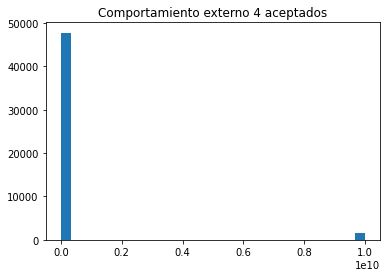

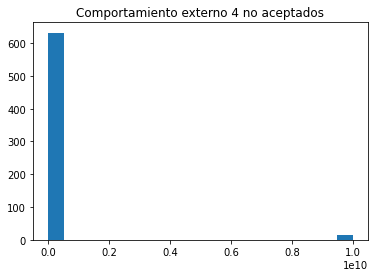

In [155]:
#Descripción del comportamiento externo 4 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['comp_externo4'].describe().apply(lambda x: format(x, 'f')))

#Descripción del comportamiento externo 4 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['comp_externo4'].describe())

#Gráfica aceptados
plt.hist(base_aceptados['comp_externo4'],bins=30)
plt.title('Comportamiento externo 4 aceptados')
plt.show()

#Gráfica no aceptados
plt.hist(base_no_aceptados['comp_externo4'],bins=20)
plt.title('Comportamiento externo 4 no aceptados')
plt.show()

### Comportamiento Mixto 1

Resumen estadístico aceptados:
count    49352.000000
mean         0.337220
std          0.037811
min          0.200000
25%          0.314695
50%          0.344640
75%          0.369320
max          0.430060
Name: comp_mixto1, dtype: object

Resumen estadístico no aceptados:
count    648.000000
mean       0.329805
std        0.041117
min        0.209160
25%        0.304910
50%        0.339890
75%        0.362960
max        0.390000
Name: comp_mixto1, dtype: float64


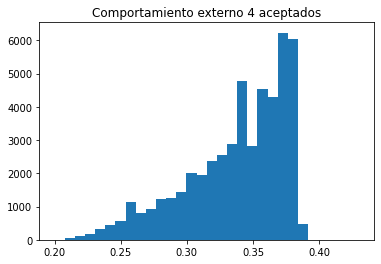

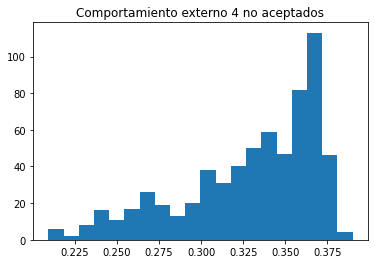

In [156]:
#Descripción del comportamiento externo 4 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['comp_mixto1'].describe().apply(lambda x: format(x, 'f')))

#Descripción del comportamiento externo 4 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['comp_mixto1'].describe())

#Gráfica aceptados
plt.hist(base_aceptados['comp_mixto1'],bins=30)
plt.title('Comportamiento mixto aceptados')
plt.show()

#Gráfica no aceptados
plt.hist(base_no_aceptados['comp_mixto1'],bins=20)
plt.title('Comportamiento mixto no aceptados')
plt.show()

### Inversión

Resumen estadístico aceptados:
count    17261.000000
mean       185.159878
std        964.922494
min          0.000012
25%          6.061260
50%         28.350175
75%        132.259277
max      95052.396733
Name: inversion, dtype: object

Resumen estadístico no aceptados:
count     275.000000
mean      235.410331
std       489.621377
min         0.000350
25%        10.486721
50%        61.470490
75%       226.751424
max      4203.606184
Name: inversion, dtype: float64


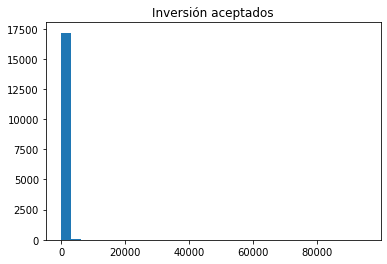

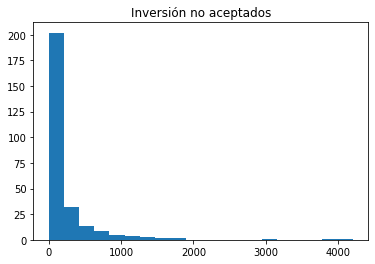

In [157]:
#Descripción del comportamiento externo 4 en la base de aceptados
print('Resumen estadístico aceptados:')
print(base_aceptados['inversion'].describe().apply(lambda x: format(x, 'f')))

#Descripción del comportamiento externo 4 en la base de no aceptados
print('\nResumen estadístico no aceptados:')
print(base_no_aceptados['inversion'].describe())

#Gráfica aceptados
plt.hist(base_aceptados['inversion'],bins=30)
plt.title('Inversión aceptados')
plt.show()

#Gráfica no aceptados
plt.hist(base_no_aceptados['inversion'],bins=20)
plt.title('Inversión no aceptados')
plt.show()

Prece que los clientes que recibieron el crédito tienen menos dinero invertido que los que no lo recibieron, igual esto se ve mas sesgado debido a que hay muchos mas datos de clientes quienes si recibieron el crédito que de los que no lo recibieron.
En ambos casos existen valores bastante extremos.
Por último veamos cuantos clientes que tenian inversión recibieron el crédito y cuantos no, igual veremos cuantos de los que tenian inversión no lo recibieron

In [179]:
print('Tenian inversión y le aprobaron el crédito:')
print((round(base_aceptados['inversion'].notna().sum()/len(base_aceptados),3)*100).astype('str')+'%')
print('\nNo tenian inversión y le aprobaron el crédito:')
print((round(base_aceptados['inversion'].isna().sum()/len(base_aceptados),3)*100).astype('str')+'%')
print('\nTenian inversión y les negaron el crédito:')
print((round(base_no_aceptados['inversion'].notna().sum()/len(base_no_aceptados),3)*100).astype('str')+'%')
print('\nNo tenian inversión y  les negaron el crédito:')
print((round(base_no_aceptados['inversion'].isna().sum()/len(base_no_aceptados),3)*100).astype('str')+'%')

Tenian inversión y le aprobaron el crédito:
35.0%

No tenian inversión y le aprobaron el crédito:
65.0%

Tenian inversión y les negaron el crédito:
42.4%

No tenian inversión y  les negaron el crédito:
57.599999999999994%


Le aprobaron mas créditos a aquellos clientes quienes no tenian una inversión en el banco que a los que no tenian una inversión en el banco